In [2]:
# Figure showing flower counting linear evaluation performance.
import pandas as pd

linear_eval_data = pd.read_excel("Linear Evaluation Results.xlsx", sheet_name="# Flowers")
linear_eval_data

,Pre-Train,Multi View?,# Views,Train Set,Test Set,MAE,SMAPE
0,COCo,N,NaN,ssl_active_3,ssl_active_2,0.87,128
1,Random,N,NaN,ssl_active_3,ssl_active_2,0.82,123
2,SimCLR,Y,4.0,ssl_active_3,ssl_active_2,0.88,130
3,COCo,N,NaN,active_1,2018-08-22 00:00:00,1.73,99
4,Random,N,NaN,active_1,2018-08-22 00:00:00,1.76,91
5,SimCLR,Y,4.0,active_1,2018-08-22 00:00:00,1.71,111
6,SimCLR,Y,2.0,active_1,2018-08-22 00:00:00,1.62,92
7,SimCLR,Y,2.0,ssl_active_3,ssl_active_2,0.72,130
8,SimCLR,N,NaN,active_1,2018-08-22 00:00:00,1.70,109
9,SimCLR,N,NaN,ssl_active_3,ssl_active_2,0.84,138


In [3]:
is_ground = linear_eval_data["Train Set"] == "ssl_active_3"
linear_eval_data["Platform"] = ["ground" if g else "aerial" for g in is_ground]

In [4]:
import numpy as np

def _create_model_name(row: pd.Series) -> str:
    if row["Pre-Train"] != "SimCLR":
        return row["Pre-Train"]
    if row["Multi View?"] == "N":
        return "Vanilla SimCLR"
    return f"{int(row['# Views'])}-View SimCLR"

linear_eval_data["Name"] = linear_eval_data.apply(_create_model_name, axis=1)
# Remove multi-view MoCo, as this experiment never worked well. We'll just add a note that it didn't work instead of including it
# and wrecking the scale of all the graphs.
linear_eval_data = linear_eval_data[np.logical_or(linear_eval_data["Pre-Train"] != "MoCo", linear_eval_data["Multi View?"] != "Y")]
# Also remove the CC experiments. I don't think I will include that in the paper.
linear_eval_data = linear_eval_data[~linear_eval_data["Pre-Train"].str.contains(" CC")]

In [5]:
linear_eval_data

,Pre-Train,Multi View?,# Views,Train Set,Test Set,MAE,SMAPE,Platform,Name
0,COCo,N,NaN,ssl_active_3,ssl_active_2,0.87,128,ground,COCo
1,Random,N,NaN,ssl_active_3,ssl_active_2,0.82,123,ground,Random
2,SimCLR,Y,4.0,ssl_active_3,ssl_active_2,0.88,130,ground,4-View SimCLR
3,COCo,N,NaN,active_1,2018-08-22 00:00:00,1.73,99,aerial,COCo
4,Random,N,NaN,active_1,2018-08-22 00:00:00,1.76,91,aerial,Random
5,SimCLR,Y,4.0,active_1,2018-08-22 00:00:00,1.71,111,aerial,4-View SimCLR
6,SimCLR,Y,2.0,active_1,2018-08-22 00:00:00,1.62,92,aerial,2-View SimCLR
7,SimCLR,Y,2.0,ssl_active_3,ssl_active_2,0.72,130,ground,2-View SimCLR
8,SimCLR,N,NaN,active_1,2018-08-22 00:00:00,1.70,109,aerial,Vanilla SimCLR
9,SimCLR,N,NaN,ssl_active_3,ssl_active_2,0.84,138,ground,Vanilla SimCLR


In [6]:
spatial_experiment_names = {"Random", "COCo", "Vanilla SimCLR", "2-View SimCLR", "3-View SimCLR"}
temporal_experiment_names = {"Random", "COCo", "Vanilla SimCLR", "4-View SimCLR", "5-View SimCLR"}
pre_train_experiment_names = {"Random", "COCo", "3-View SimCLR", "MoCo"}

# Only show the results for different pre-training approaches.
linear_eval_data = linear_eval_data[linear_eval_data["Name"].isin(pre_train_experiment_names)]

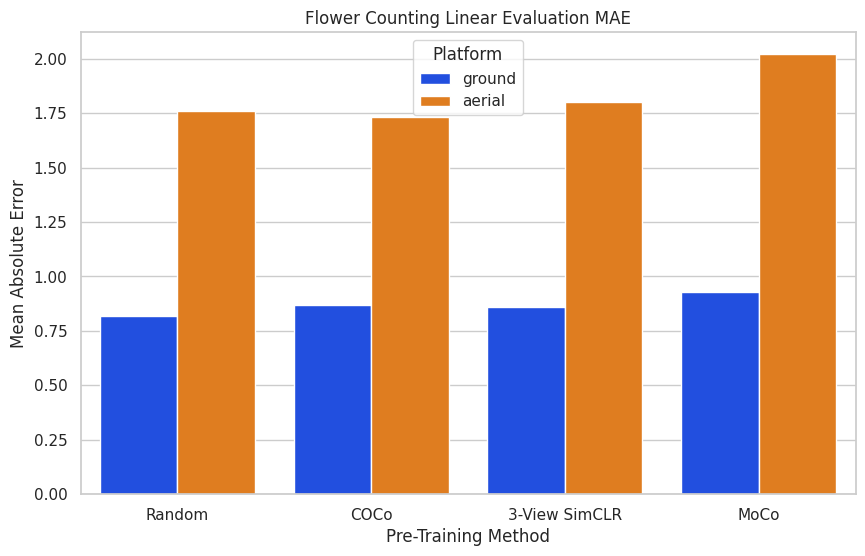

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
x_ordered = ["Random", "COCo", "3-View SimCLR", "MoCo"]
sns.barplot(data=linear_eval_data, x="Name", y='MAE', hue='Platform', palette='bright', order=x_ordered)
plt.title('Flower Counting Linear Evaluation MAE')
plt.xlabel('Pre-Training Method')
plt.ylabel('Mean Absolute Error')
plt.legend(title='Platform')

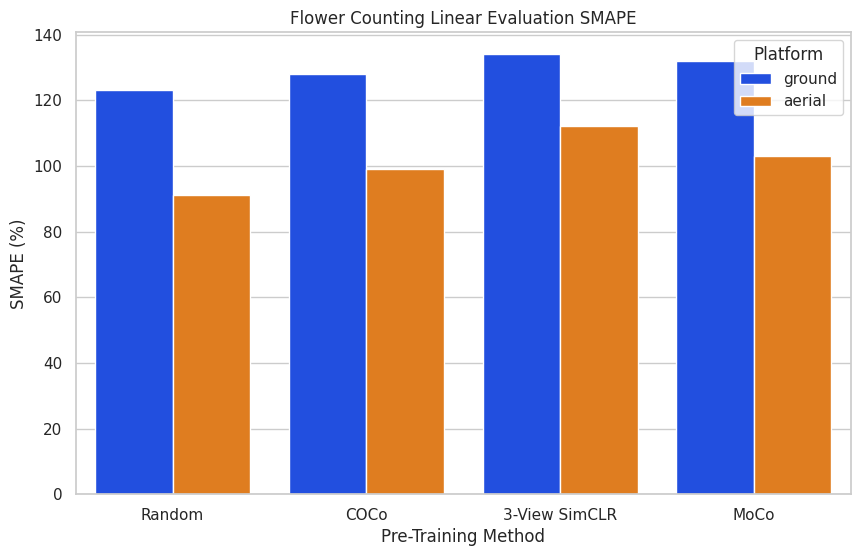

In [8]:
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=linear_eval_data, x='Name', y='SMAPE', hue='Platform', palette='bright', order=x_ordered)
plt.title('Flower Counting Linear Evaluation SMAPE')
plt.xlabel('Pre-Training Method')
plt.ylabel('SMAPE (%)')
plt.legend(title='Platform')

In [9]:
# Create the figure showing plot status linear eval data.
plot_status_data = pd.read_excel("Linear Evaluation Results.xlsx", sheet_name="Plot Status")
# Remove the CC experiments. I don't think I will include that in the paper.
plot_status_data = plot_status_data[~plot_status_data["Pre-Train"].str.contains(" CC")]
plot_status_data

,Pre-Train,Multi View?,# Views,Test Acc.
0,SimCLR,Y,4.0,0.85
1,COCo,N,NaN,0.70
2,Random,N,NaN,0.45
3,SimCLR,Y,2.0,0.85
4,SimCLR,N,NaN,0.85
5,SimCLR,Y,3.0,0.90
6,SimCLR,Y,5.0,0.80
7,MoCo,N,NaN,0.90
8,MoCo,Y,2.0,0.50
18,MoCo Pretrained,N,NaN,0.70


In [10]:
plot_status_data["Name"] = plot_status_data.apply(_create_model_name, axis=1)
# Remove multi-view MoCo, as this experiment never worked well. We'll just add a note that it didn't work instead of including it
# and wrecking the scale of all the graphs.
plot_status_data = plot_status_data[np.logical_or(plot_status_data["Pre-Train"] != "MoCo", plot_status_data["Multi View?"] != "Y")]
plot_status_data

,Pre-Train,Multi View?,# Views,Test Acc.,Name
0,SimCLR,Y,4.0,0.85,4-View SimCLR
1,COCo,N,NaN,0.70,COCo
2,Random,N,NaN,0.45,Random
3,SimCLR,Y,2.0,0.85,2-View SimCLR
4,SimCLR,N,NaN,0.85,Vanilla SimCLR
5,SimCLR,Y,3.0,0.90,3-View SimCLR
6,SimCLR,Y,5.0,0.80,5-View SimCLR
7,MoCo,N,NaN,0.90,MoCo
18,MoCo Pretrained,N,NaN,0.70,MoCo Pretrained


In [11]:
# Split dataset into spatial, temporal, and multiple pre-training approaches.
plot_status_spatial = plot_status_data[plot_status_data["Name"].isin(spatial_experiment_names)].copy()
plot_status_temporal = plot_status_data[plot_status_data["Name"].isin(temporal_experiment_names)].copy()
plot_status_pre_train = plot_status_data[plot_status_data["Name"].isin(pre_train_experiment_names)].copy()

# Clean up some of the naming.
plot_status_spatial.loc[:, "Name"] = plot_status_spatial["Name"].apply(lambda n: n.split()[0])
plot_status_temporal.loc[:, "Name"] = plot_status_temporal["Name"].apply(lambda n: n.split()[0])

Text(0, 0.5, 'Accuracy (%)')

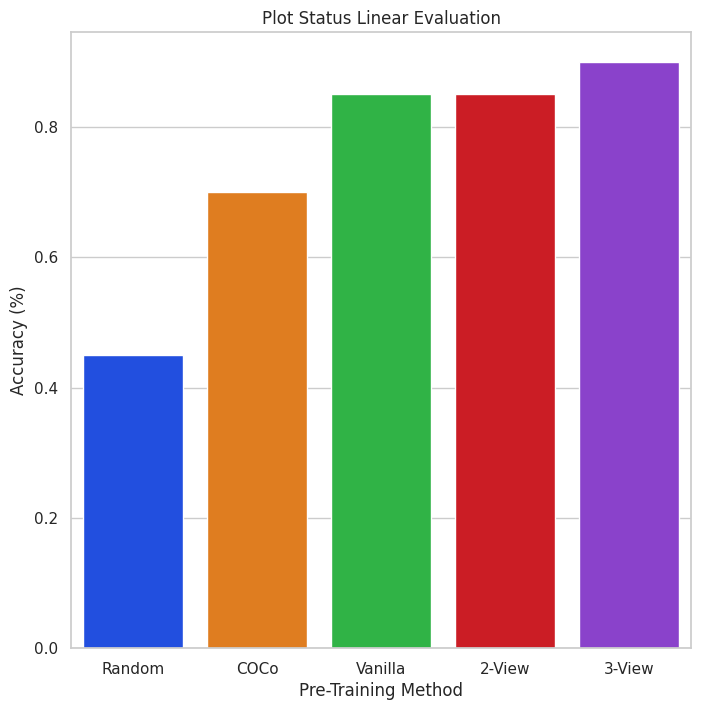

In [25]:
plt.figure(figsize=(8, 8))
x_order = ["Random", "COCo", "Vanilla", "2-View", "3-View"]
sns.barplot(data=plot_status_spatial, x='Name', y='Test Acc.', palette='bright', order=x_order)
plt.title('Plot Status Linear Evaluation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

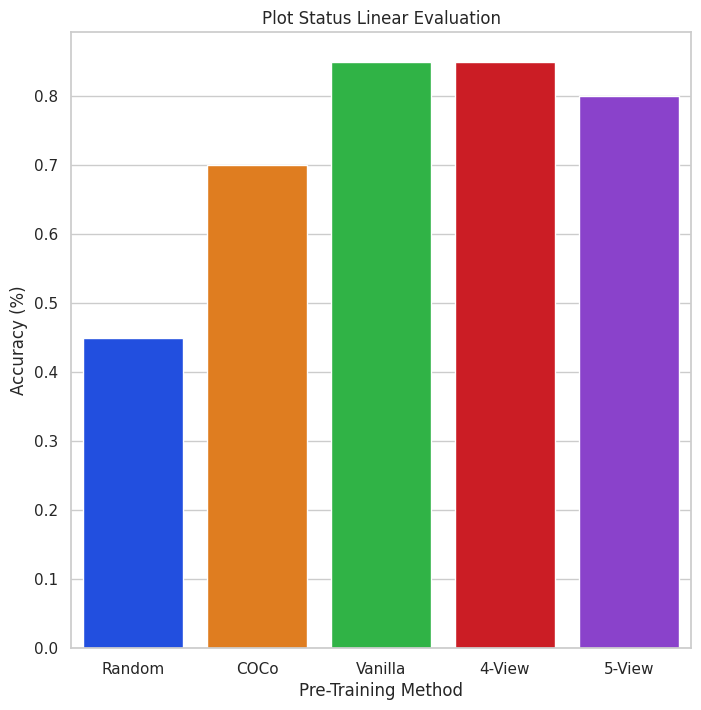

In [26]:
plt.figure(figsize=(8, 8))
x_order = ["Random", "COCo", "Vanilla", "4-View", "5-View"]
sns.barplot(data=plot_status_temporal, x='Name', y='Test Acc.', palette='bright', order=x_order)
plt.title('Plot Status Linear Evaluation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')

Text(0, 0.5, 'Accuracy (%)')

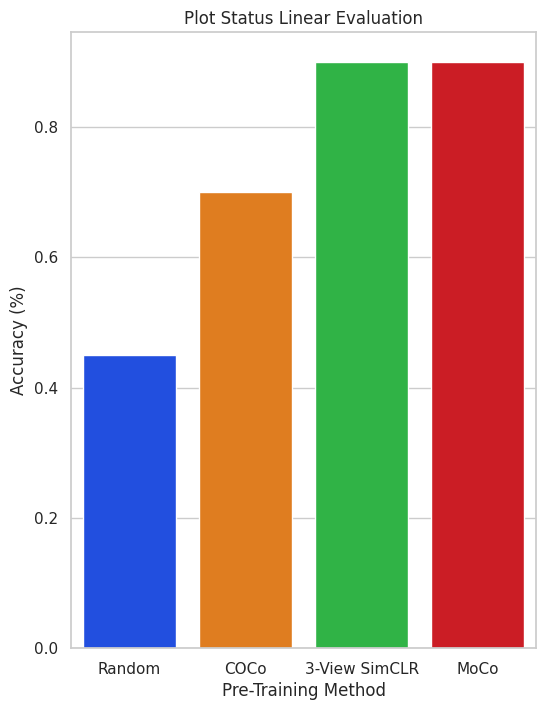

In [27]:
plt.figure(figsize=(6, 8))
x_order = ["Random", "COCo", "3-View SimCLR", "MoCo"]
sns.barplot(data=plot_status_pre_train, x='Name', y='Test Acc.', palette='bright', order=x_order)
plt.title('Plot Status Linear Evaluation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')

In [15]:
import pandas as pd

# Create semi-supervised training figures.
random_maps_0_5 = [0] * 3
coco_maps_0_5 = [0.6465926427918839, 0.5964542796146257, 0.5348510143574495]
vanilla_maps_0_5 = [0.2284062132143119, 0.20472973109870907, 0.14347617950903893]
view_2_maps_0_5 = [0.31594438633426136, 0.2954195463093703, 0.2878499402157016, 0.2505886499629378, 0.24949244140143031]
view_3_maps_0_5 = [0.34777463076514487, 0.32744410098175336, 0.2673829176991453]
view_4_maps_0_5 = [0.2950983352339338, 0.25059299575948757, 0.24060250208833342]
view_5_maps_0_5 = [0.2863129814883511, 0.28141680364570987, 0.2620731982360415]
moco_maps_0_5 = [0.47113, 0.46866, 0.40942]
moco_pt_maps_0_5 = [0.260941516784418, 0.3131305131116965, 0.24722420045039212]

maps_0_5 = random_maps_0_5 + coco_maps_0_5 + vanilla_maps_0_5 + view_2_maps_0_5 + view_3_maps_0_5 + view_4_maps_0_5 + view_5_maps_0_5 + moco_maps_0_5 + moco_pt_maps_0_5

In [16]:
# Create semi-supervised training figures.
random_maps_0_95 = [0] * 3
coco_maps_0_95 = [0.49472, 0.40513, 0.36209]
vanilla_maps_0_95 = [0.09485411212487153, 0.08320092706078355, 0.06684267473591418]
view_2_maps_0_95 = [0.1759376219836175, 0.1590482638862619, 0.14854982476430942, 0.1332085006807918, 0.12187633752774367]
view_3_maps_0_95 = [0.18926761418681476, 0.1829721031773426, 0.1533082440819751]
view_4_maps_0_95 = [0.13949452988973715, 0.13519973357744478, 0.12520435978734118]
view_5_maps_0_95 = [0.15373847947900038, 0.14366768602726393, 0.12462590667046577]
moco_maps_0_95 = [0.22164, 0.22175, 0.19265204015721066]
moco_pt_maps_0_95 = [0.15171386821974503, 0.2134316278639539, 0.16590059340652338]

maps_0_95 = random_maps_0_95 + coco_maps_0_95 + vanilla_maps_0_95 + view_2_maps_0_95 + view_3_maps_0_95 + view_4_maps_0_95 + view_5_maps_0_95 + moco_maps_0_95 + moco_pt_maps_0_95
names = ["Random"] * len(random_maps_0_5) + ["COCo"] * len(coco_maps_0_5) + ["Vanilla SimCLR"] * len(vanilla_maps_0_5) + \
    ["2-View SimCLR"] * len(view_2_maps_0_5) + ["3-View SimCLR"] * len(view_3_maps_0_5) + ["4-View SimCLR"] * len(view_4_maps_0_5) + ["5-View SimCLR"] * len(view_5_maps_0_5) + \
    ["MoCo"] * len(moco_maps_0_5) + ["MoCo Pretrained"] * len(moco_pt_maps_0_5)
map_types = ["mAP@0.5"] * len(maps_0_5) + ["mAP@0.5:0.95"] * len(maps_0_95)
semi_supervised_results_ground = pd.DataFrame(data={"Name": names * 2, "mAP": maps_0_5 + maps_0_95, "Metric": map_types, "Dataset": ["ground" for _ in names * 2]})
semi_supervised_results_ground

,Name,mAP,Metric,Dataset
0,Random,0.000000,mAP@0.5,ground
1,Random,0.000000,mAP@0.5,ground
2,Random,0.000000,mAP@0.5,ground
3,COCo,0.646593,mAP@0.5,ground
4,COCo,0.596454,mAP@0.5,ground
5,COCo,0.534851,mAP@0.5,ground
6,Vanilla SimCLR,0.228406,mAP@0.5,ground
7,Vanilla SimCLR,0.204730,mAP@0.5,ground
8,Vanilla SimCLR,0.143476,mAP@0.5,ground
9,2-View SimCLR,0.315944,mAP@0.5,ground


In [17]:
coco_maps_0_5 = [0.7437818640433991, 0.7194810230562404, 0.7139373964685265]
coco_maps_0_95 = [0.4607844675488253, 0.43023009195712564, 0.4256619813071034]
random_maps_0_5 = [0.38956318240481685, 0.3739270335686412, 0.3578194321415771]
random_maps_0_95 = [0.1708983883811221, 0.1589901798711411, 0.1524602821625644]
vanilla_maps_0_5 = [0.2826877750022493, 0.2777211750255481, 0.23467493994442373]
vanilla_maps_0_95 = [0.135833563595355, 0.1293347390348739, 0.11160042073468461]
view_2_maps_0_5 = [0.5291899722266377, 0.5041690687546687, 0.5006493859002993]
view_2_maps_0_95 = [0.26236330734223623, 0.23124962580872593, 0.2308503457260071]
view_3_maps_0_5 = [0.5711926982624815, 0.5697556225993778, 0.5394528002549515]
view_3_maps_0_95 = [0.2829768820403252, 0.2740352111409542, 0.26691105648634744]
view_4_maps_0_5 = [0.605338346630161, 0.57201994296665, 0.5418738899148547]
view_4_maps_0_95 = [0.28067222810013204, 0.2677340125297493, 0.25759428351035474]
view_5_maps_0_5 = [0.6016858724475019, 0.5771312309830503, 0.5658790105491486]
view_5_maps_0_95 = [0.30039435853460655, 0.272764076390188, 0.2638459102305321]
moco_maps_0_5 = [0.6105313066534491, 0.6049253004764937, 0.5843417618246421]
moco_maps_0_95 = [0.28797, 0.2954335351145108, 0.28365972113733845]
moco_pt_maps_0_5 = [0.6871224173945075, 0.7195396514895994, 0.6682928879088506]
moco_pt_maps_0_95 = [0.3672787880155203, 0.4023593637281608, 0.35120571430707465]

maps_0_5 = random_maps_0_5 + coco_maps_0_5 + vanilla_maps_0_5 + view_2_maps_0_5 + view_3_maps_0_5 + view_4_maps_0_5 + view_5_maps_0_5 + moco_maps_0_5 + moco_pt_maps_0_5
maps_0_95 = random_maps_0_95 + coco_maps_0_95 + vanilla_maps_0_95 + view_2_maps_0_95 + view_3_maps_0_95 + view_4_maps_0_95 + view_5_maps_0_95 + moco_maps_0_95 + moco_pt_maps_0_95
map_types = ["mAP@0.5"] * len(maps_0_5) + ["mAP@0.5:0.95"] * len(maps_0_95)
names = ["Random"] * len(random_maps_0_5) + ["COCo"] * len(coco_maps_0_5) + ["Vanilla SimCLR"] * len(vanilla_maps_0_5) + \
    ["2-View SimCLR"] * len(view_2_maps_0_5) + ["3-View SimCLR"] * len(view_3_maps_0_5) + ["4-View SimCLR"] * len(view_4_maps_0_5) + ["5-View SimCLR"] * len(view_5_maps_0_5) + \
    ["MoCo"] * len(moco_maps_0_5) + ["MoCo Pretrained"] * len(moco_pt_maps_0_5)
semi_supervised_results_aerial = pd.DataFrame(data={"Name": names * 2, "mAP": maps_0_5 + maps_0_95, "Metric": map_types, "Dataset": ["aerial" for _ in names * 2]})
semi_supervised_results_aerial

,Name,mAP,Metric,Dataset
0,Random,0.389563,mAP@0.5,aerial
1,Random,0.373927,mAP@0.5,aerial
2,Random,0.357819,mAP@0.5,aerial
3,COCo,0.743782,mAP@0.5,aerial
4,COCo,0.719481,mAP@0.5,aerial
5,COCo,0.713937,mAP@0.5,aerial
6,Vanilla SimCLR,0.282688,mAP@0.5,aerial
7,Vanilla SimCLR,0.277721,mAP@0.5,aerial
8,Vanilla SimCLR,0.234675,mAP@0.5,aerial
9,2-View SimCLR,0.529190,mAP@0.5,aerial


In [18]:
# Extract data for only (spatial) multi-view experiments.
semi_supervised_results = pd.concat([semi_supervised_results_ground, semi_supervised_results_aerial], ignore_index=True)
semi_supervised_spatial = semi_supervised_results[semi_supervised_results["Name"].isin(spatial_experiment_names)].copy()
# Make the names a little bit less verbose.
semi_supervised_spatial.loc[:, "Name"] = semi_supervised_spatial["Name"].apply(lambda name: name.split()[0])

# Do the same for temporal multi-view experiments.
semi_supervised_temporal = semi_supervised_results[semi_supervised_results["Name"].isin(temporal_experiment_names)].copy()
semi_supervised_temporal.loc[:, "Name"] = semi_supervised_temporal["Name"].apply(lambda name: name.split()[0])

# And for different forms of pre-training.
semi_supervised_pre_train = semi_supervised_results[semi_supervised_results["Name"].isin(pre_train_experiment_names)].copy()

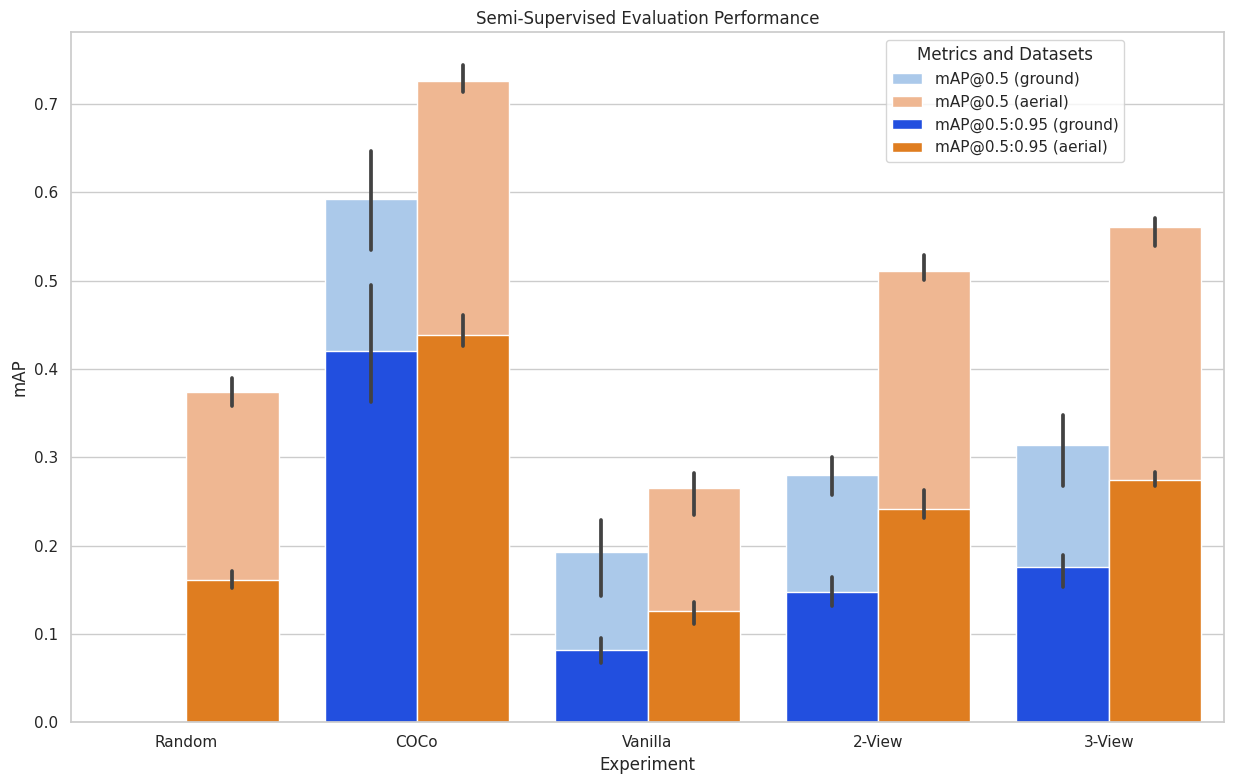

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def draw_semi_supervised_plot(data, x_ordering):
    # Set seaborn style
    sns.set(style="whitegrid")

    # Define the figure and axis
    plt.figure(figsize=(2.5 * len(x_ordering), 8))

    # Get unique datasets and metrics
    datasets = data['Dataset'].unique()
    metrics = data['Metric'].unique()

    # Iterate through each metric and plot overlapping bars
    for i, metric in enumerate(metrics):
        palette = sns.color_palette("bright", len(datasets))
        if metric == "mAP@0.5":
            # For the broader metric, use desaturated colors.
            palette = sns.color_palette("pastel", len(datasets))

        sns.barplot(
            x='Name', 
            y='mAP', 
            hue='Dataset', 
            data=data[data['Metric'] == metric],
            ci=95, 
            dodge=True,
            palette=palette,
        )

    # Set labels and title
    plt.xlabel('Experiment')
    plt.ylabel('mAP')
    plt.title('Semi-Supervised Evaluation Performance')

    # Update the legend to include metric information
    handles, labels = plt.gca().get_legend_handles_labels()
    # Create a new legend for metrics and datasets
    metric_labels = [f'{metric} ({dataset})' for metric in metrics for dataset in semi_supervised_spatial['Dataset'].unique()]
    plt.legend(handles[:len(metric_labels)], metric_labels, title='Metrics and Datasets', bbox_to_anchor=(0.7, 1), loc='upper left')

    plt.tight_layout()

    # Show the plot
    plt.show()
    
# Ordering to use for the x-axis.
x_ordering = ["Random", "COCo", "Vanilla", "2-View", "3-View"]
draw_semi_supervised_plot(semi_supervised_spatial, x_ordering)

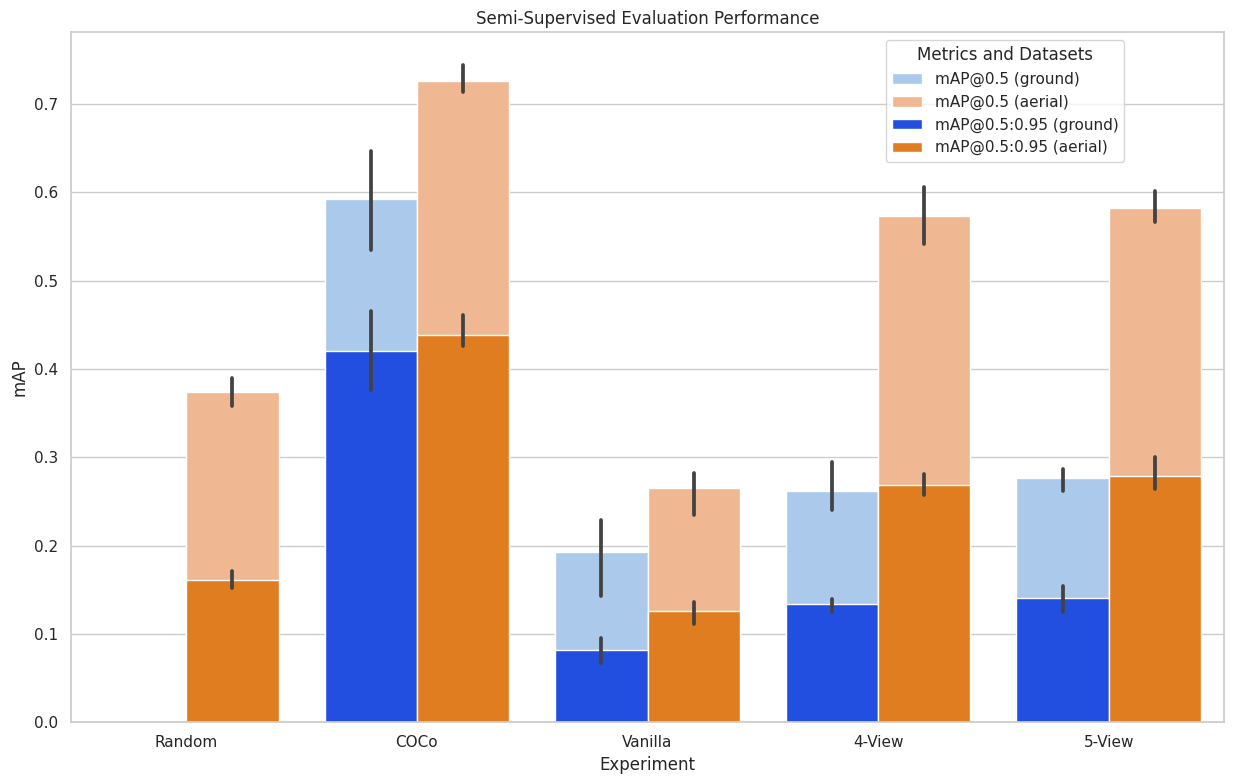

In [23]:
# Ordering to use for the x-axis.
x_ordering = ["Random", "COCo", "Vanilla", "4-View", "5-View"]
draw_semi_supervised_plot(semi_supervised_temporal, x_ordering)

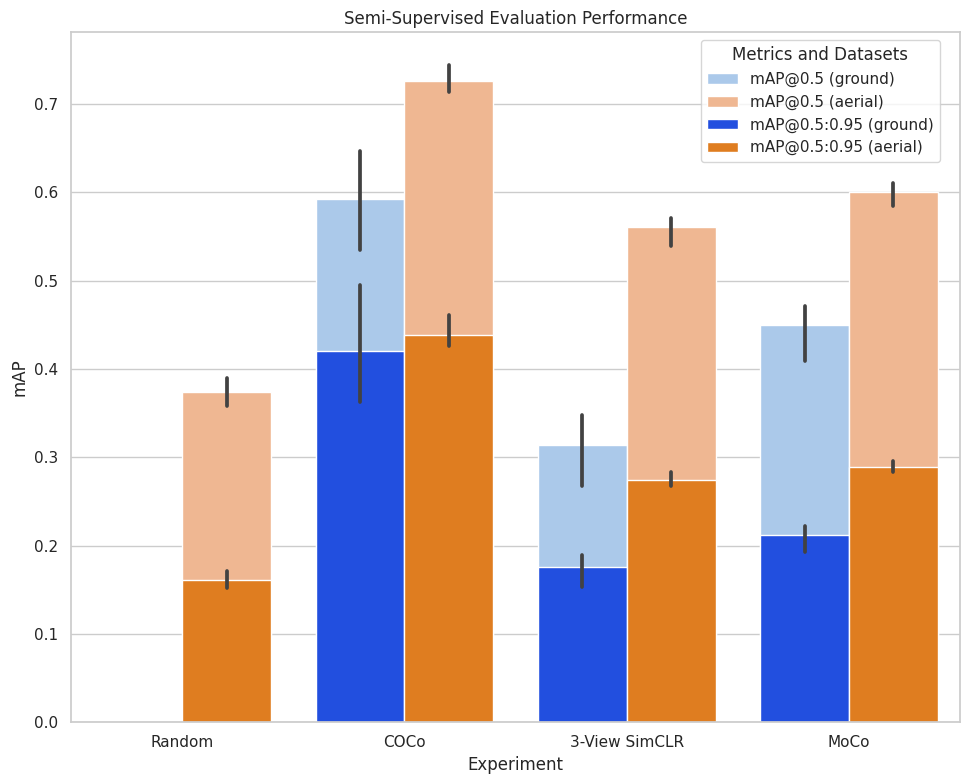

In [24]:
# Ordering to use for the x-axis.
x_ordering = ["Random", "COCo", "3-View SimCLR", "MoCo"]
draw_semi_supervised_plot(semi_supervised_pre_train, x_ordering)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set seaborn style
sns.set(style="whitegrid")

# Define the figure and axis
plt.figure(figsize=(12, 8))

# Ordering to use for the x-axis.
x_ordering = ["Random", "COCo", "Vanilla", "4-View", "5-View"]

# Get unique datasets and metrics
datasets = semi_supervised_spatial['Dataset'].unique()
metrics = semi_supervised_spatial['Metric'].unique()

# Iterate through each metric and plot overlapping bars
for i, metric in enumerate(metrics):
    palette = sns.color_palette("bright", len(datasets))
    if metric == "mAP@0.5":
        # For the broader metric, use desaturated colors.
        palette = sns.color_palette("pastel", len(datasets))
    
    sns.barplot(
        x='Name', 
        y='mAP', 
        hue='Dataset', 
        data=semi_supervised_spatial[semi_supervised_spatial['Metric'] == metric],
        ci=95, 
        dodge=True,
        palette=palette,
    )

# Set labels and title
plt.xlabel('Experiment')
plt.ylabel('mAP')
plt.title('Semi-Supervised Evaluation Performance')

# Update the legend to include metric information
handles, labels = plt.gca().get_legend_handles_labels()
# Create a new legend for metrics and datasets
metric_labels = [f'{metric} ({dataset})' for metric in metrics for dataset in semi_supervised_spatial['Dataset'].unique()]
plt.legend(handles[:len(metric_labels)], metric_labels, title='Metrics and Datasets', bbox_to_anchor=(0.75, 1), loc='upper left')

plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# Generate video plots.
plot_status_scratch = [62.5, 62.5, 68.75]
plot_status_simclr = [81.25] * 3
num_flowers_scratch = [62.5] * 3 + [75]
num_flowers_simclr = [62.5, 75, 68.75, 56.25]
plot_status_moco = [75] * 2 + [81.25]
num_flowers_moco = [81.25] * 2 + [87.5]
plot_status_byol = [75] * 2 + [56.25]
num_flowers_byol = [56.25, 50, 68.75]
plot_status_swav = [81.25, 81.25, 75]
num_flowers_swav = [68.75, 68.75, 56.25]

names = ["Random"] * len(plot_status_scratch) + ["SimCLR"] * len(plot_status_simclr) + ["MoCo"] * len(plot_status_moco) + ["BYOL"] * len(plot_status_byol) + ["SwAV"] * len(plot_status_swav)
plot_status_data = pd.DataFrame(data={"Name": names, "Accuracy": plot_status_scratch + plot_status_simclr + plot_status_moco + plot_status_byol + plot_status_swav})
plot_status_data

,Name,Accuracy
0,Random,62.50
1,Random,62.50
2,Random,68.75
3,SimCLR,81.25
4,SimCLR,81.25
5,SimCLR,81.25
6,MoCo,75.00
7,MoCo,75.00
8,MoCo,81.25
9,BYOL,75.00


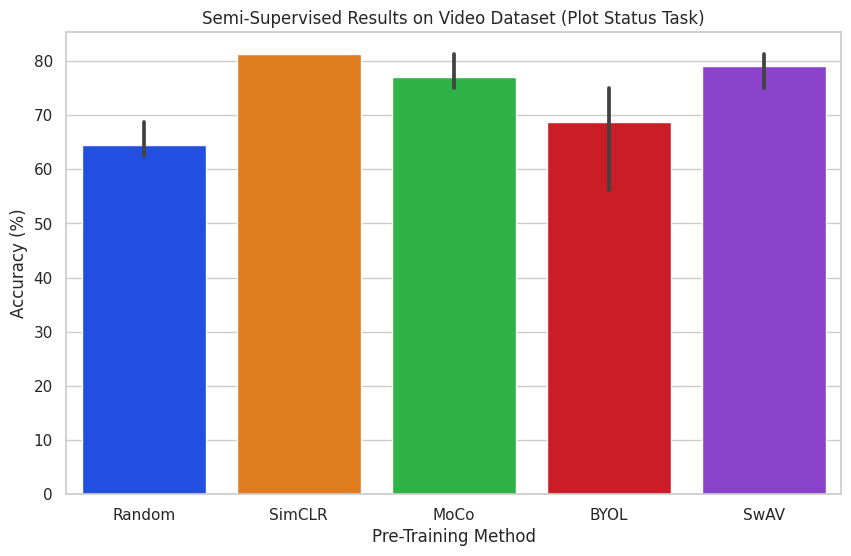

In [16]:
# Set seaborn style
sns.set(style="whitegrid")

x_ordered = ["Random", "SimCLR", "MoCo", "BYOL", "SwAV"]

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_status_data, x='Name', y='Accuracy', ci=95, palette='bright', order=x_ordered)
plt.title('Semi-Supervised Results on Video Dataset (Plot Status Task)')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')
plt.show()

In [17]:
names = ["Random"] * len(num_flowers_scratch) + ["SimCLR"] * len(num_flowers_simclr) + ["MoCo"] * len(num_flowers_moco) + ["BYOL"] * len(num_flowers_byol) + ["SwAV"] * len(num_flowers_swav)
num_flowers_data = pd.DataFrame(data={"Name": names, "Accuracy": num_flowers_scratch + num_flowers_simclr + num_flowers_moco + num_flowers_byol + num_flowers_swav})
num_flowers_data

,Name,Accuracy
0,Random,62.50
1,Random,62.50
2,Random,62.50
3,Random,75.00
4,SimCLR,62.50
5,SimCLR,75.00
6,SimCLR,68.75
7,SimCLR,56.25
8,MoCo,81.25
9,MoCo,81.25


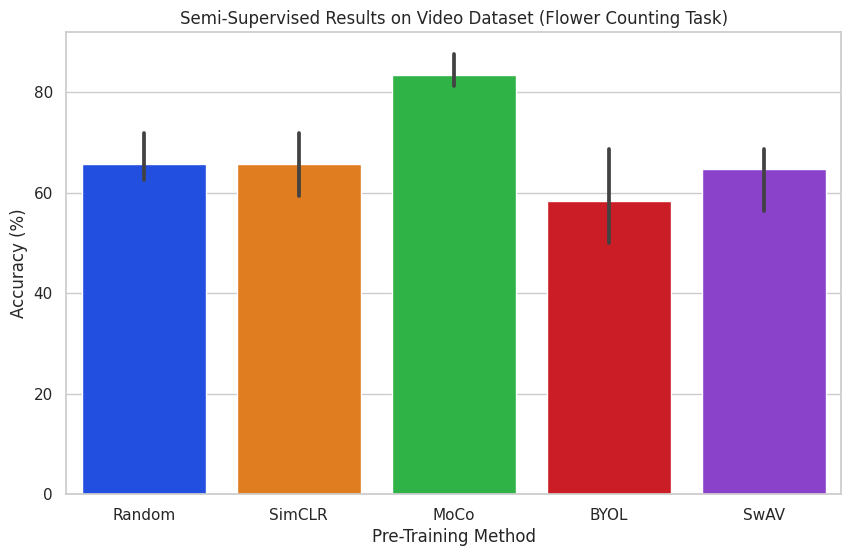

In [18]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=num_flowers_data, x='Name', y='Accuracy', ci=95, palette='bright', order=x_ordered)
plt.title('Semi-Supervised Results on Video Dataset (Flower Counting Task)')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')
plt.show()

In [19]:
# Draw a plot for spatial-only training.
num_flowers_moco_spatial = [68.75] * 3
num_flowers_simclr_spatial = [68.75] * 3
num_flowers_moco_temp = [62.5] * 2 + [56.25]
num_flowers_simclr_temp = [68.75, 75, 62.5]

names = ["SimCLR"] * (len(num_flowers_simclr) + len(num_flowers_simclr_spatial) + len(num_flowers_simclr_temp)) + ["MoCo"] * (len(num_flowers_moco) + len(num_flowers_moco_spatial) + len(num_flowers_moco_temp))
augmentation = ["Spatiotemporal"] * len(num_flowers_simclr) + ["Spatial Only"] * len(num_flowers_simclr_spatial) + ["Temporal Only"] * len(num_flowers_simclr_temp) + \
    ["Spatiotemporal"] * len(num_flowers_moco) + ["Spatial Only"] * len(num_flowers_moco_spatial) + ["Temporal Only"] * len(num_flowers_moco_temp)
num_flowers_data = pd.DataFrame(data={"Name": names, "Accuracy": num_flowers_simclr + num_flowers_simclr_spatial + num_flowers_simclr_temp + num_flowers_moco + num_flowers_moco_spatial + num_flowers_moco_temp,
                                      "Augmentation": augmentation})
num_flowers_data

,Name,Accuracy,Augmentation
0,SimCLR,62.50,Spatiotemporal
1,SimCLR,75.00,Spatiotemporal
2,SimCLR,68.75,Spatiotemporal
3,SimCLR,56.25,Spatiotemporal
4,SimCLR,68.75,Spatial Only
5,SimCLR,68.75,Spatial Only
6,SimCLR,68.75,Spatial Only
7,SimCLR,68.75,Temporal Only
8,SimCLR,75.00,Temporal Only
9,SimCLR,62.50,Temporal Only


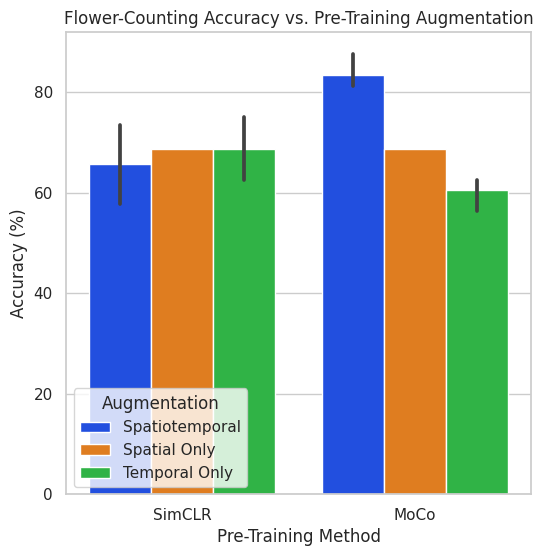

In [20]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(6, 6))
sns.barplot(data=num_flowers_data, x='Name', y='Accuracy', hue="Augmentation", ci=95, palette='bright', order=["SimCLR", "MoCo"])
plt.title('Flower-Counting Accuracy vs. Pre-Training Augmentation')
plt.xlabel('Pre-Training Method')
plt.ylabel('Accuracy (%)')
plt.show()

In [9]:
# Figure showing performance impacts of pre-training time.
import pandas as pd

training_time_data = pd.read_excel("Training Time Comparison.xlsx")
training_time_data

,Model,Iterations,Accuracy,Run
0,3-View SimCLR,2167,0.60,1
1,3-View SimCLR,6507,0.70,1
2,3-View SimCLR,10835,0.85,1
3,3-View SimCLR,15169,0.95,1
4,3-View SimCLR,19503,0.85,1
...,...,...,...,...
58,Vanilla SimCLR,16800,0.85,2
59,Vanilla SimCLR,18000,0.85,2
60,MoCo,2718,0.70,1
61,MoCo,5436,0.85,1


In [10]:
from scipy.interpolate import interp1d
import pandas as pd

# Use interpolation to handle the fact that different runs save different checkpoints.
by_runs = training_time_data.groupby(["Model", "Run"])
interpolators = {}

for model, run in by_runs.groups:
    group_data = by_runs.get_group((model, run))
    interpolator = interp1d(group_data["Iterations"], group_data["Accuracy"])
    interpolators.setdefault(model, []).append(interpolator)
    
def interpolate_accuracy(row):
    model = row["Model"]
    steps = row["Iterations"]
    
    output_data = {"Model": [], "Iterations": [], "Accuracy": []}
    for interpolator in interpolators[model]:
        try:
            interpolated_acc = interpolator(steps)
        except ValueError:
            # This would require extrapolation. Ignore it.
            continue
        output_data["Model"].append(model)
        output_data["Iterations"].append(steps)
        output_data["Accuracy"].append(float(interpolated_acc))
    
    return pd.DataFrame(output_data)
        
interpolated = []
for _, row in training_time_data.iterrows():
    interpolated.append(interpolate_accuracy(row))
training_time_interp = pd.concat(interpolated, ignore_index=True)

In [11]:
training_time_interp

,Model,Iterations,Accuracy
0,3-View SimCLR,2167,0.600000
1,3-View SimCLR,6507,0.700000
2,3-View SimCLR,10835,0.850000
3,3-View SimCLR,10835,0.737135
4,3-View SimCLR,10835,0.619297
...,...,...,...
141,MoCo,2718,0.723400
142,MoCo,5436,0.850000
143,MoCo,5436,0.853543
144,MoCo,10872,0.900000


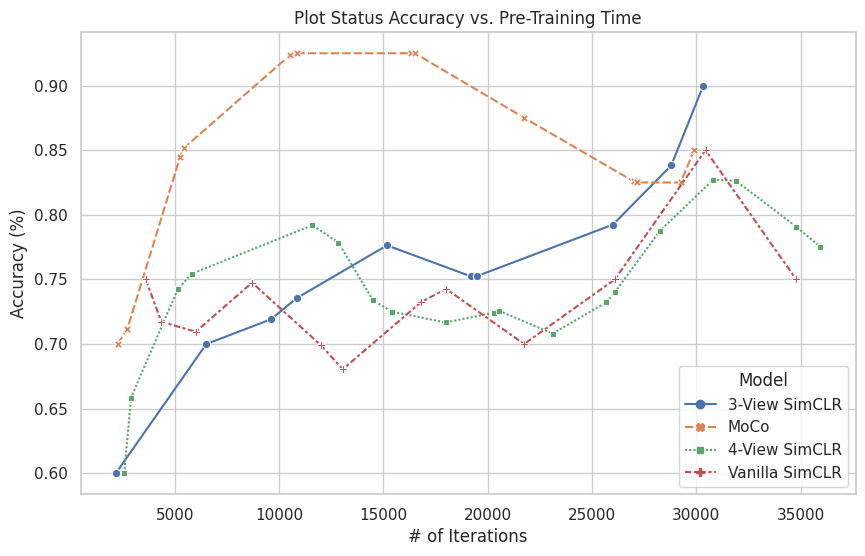

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=training_time_interp, x='Iterations', y='Accuracy', hue='Model', style='Model', markers=True, estimator="mean", ci=None)
plt.title('Plot Status Accuracy vs. Pre-Training Time')
plt.xlabel('# of Iterations')
plt.ylabel('Accuracy (%)')
plt.legend(title='Model')
plt.show()

In [45]:
# Draw a plot comparing frozen and unfrozen models.
coco_maps_0_5 = [0.6465926427918839, 0.5964542796146257, 0.5348510143574495]
view_3_maps_0_5 = [0.34777463076514487, 0.32744410098175336, 0.2673829176991453]
moco_maps_0_5 = [0.47113, 0.46866, 0.40942]
moco_pt_maps_0_5 = [0.260941516784418, 0.3131305131116965, 0.24722420045039212]

coco_unfrozen_maps_0_5 = [0.6457321078142632, 0.5811750225377761, 0.558027008789041]
view_3_unfrozen_maps_0_5 = [0.5673288800332285, 0.5907897871812885, 0.5678208737123143]
moco_unfrozen_maps_0_5 = [0.6593042687404889, 0.6219611289394694, 0.598154904266735]
moco_pt_unfrozen_maps_0_5 = [0.4935082077006461, 0.451737638864433, 0.3906290255362472]

maps_0_5 = coco_maps_0_5 + view_3_maps_0_5 + moco_maps_0_5 + moco_pt_maps_0_5
maps_0_5_unfrozen = coco_unfrozen_maps_0_5 + view_3_unfrozen_maps_0_5 + moco_unfrozen_maps_0_5 + moco_pt_unfrozen_maps_0_5
training_types = ["Frozen"] * len(maps_0_5) + ["Unfrozen"] * len(maps_0_5_unfrozen)
names = ["COCo"] * len(coco_maps_0_5) + ["3-View SimCLR"] * len(view_3_maps_0_5) + \
    ["MoCo"] * len(moco_maps_0_5) + ["MoCo Pretrained"] * len(moco_pt_maps_0_5)
x_ordered = ["COCo", "3-View SimCLR", "MoCo", "MoCo Pretrained"]
semi_supervised_results = pd.DataFrame(data={"Name": names * 2, "mAP": maps_0_5 + maps_0_5_unfrozen, "Fine-Tuning": training_types})
semi_supervised_results

,Name,mAP,Fine-Tuning
0,COCo,0.646593,Frozen
1,COCo,0.596454,Frozen
2,COCo,0.534851,Frozen
3,3-View SimCLR,0.347775,Frozen
4,3-View SimCLR,0.327444,Frozen
5,3-View SimCLR,0.267383,Frozen
6,MoCo,0.471130,Frozen
7,MoCo,0.468660,Frozen
8,MoCo,0.409420,Frozen
9,MoCo Pretrained,0.260942,Frozen


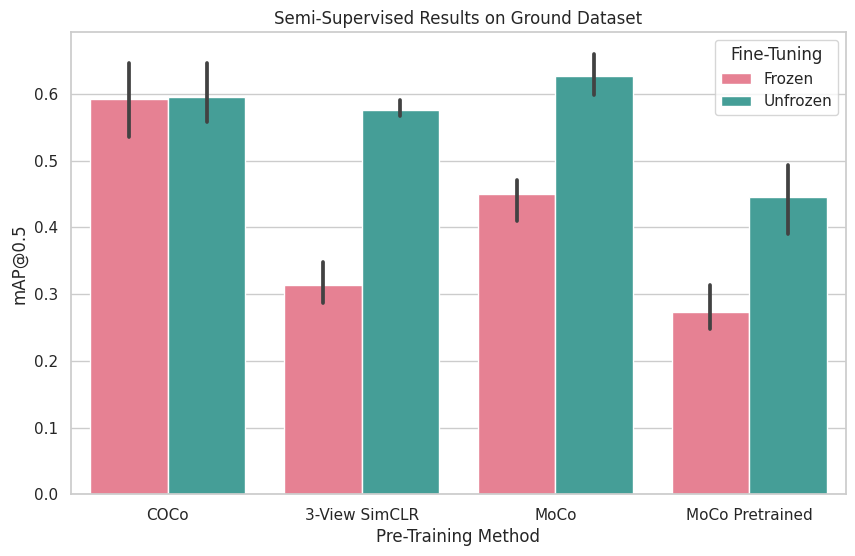

In [47]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=semi_supervised_results, x='Name', y='mAP', ci=95, palette='husl', order=x_ordered, hue="Fine-Tuning")
plt.title('Semi-Supervised Results on Ground Dataset')
plt.xlabel('Pre-Training Method')
plt.ylabel('mAP@0.5')
plt.show()

In [48]:
coco_maps_0_5 = [0.7437818640433991, 0.7194810230562404, 0.7139373964685265]
view_3_maps_0_5 = [0.5711926982624815, 0.5697556225993778, 0.5394528002549515]
view_4_maps_0_5 = [0.605338346630161, 0.57201994296665, 0.5418738899148547]
moco_maps_0_5 = [0.6105313066534491, 0.6049253004764937, 0.5843417618246421]
moco_pt_maps_0_5 = [0.6871224173945075, 0.7195396514895994, 0.6682928879088506]

coco_unfrozen_maps_0_5 = [0.8375772821118384, 0.8190649381001345, 0.8375772821118384]
view_3_unfrozen_maps_0_5 = [0.5673288800332285, 0.5907897871812885, 0.5678208737123143]
moco_unfrozen_maps_0_5 = [0.7490351851637232, 0.7719199575344589, 0.7391067328215756]
moco_pt_unfrozen_maps_0_5 = [0.7862246243612404, 0.805078027851678, 0.7882646599288086]

maps_0_5 = coco_maps_0_5 + view_3_maps_0_5 + moco_maps_0_5 + moco_pt_maps_0_5
maps_0_5_unfrozen = coco_unfrozen_maps_0_5 + view_3_unfrozen_maps_0_5 + moco_unfrozen_maps_0_5 + moco_pt_unfrozen_maps_0_5
training_types = ["Frozen"] * len(maps_0_5) + ["Unfrozen"] * len(maps_0_5_unfrozen)
names = ["COCo"] * len(coco_maps_0_5) + ["3-View SimCLR"] * len(view_3_maps_0_5) + \
    ["MoCo"] * len(moco_maps_0_5) + ["MoCo Pretrained"] * len(moco_pt_maps_0_5)
x_ordered = ["COCo", "3-View SimCLR", "MoCo", "MoCo Pretrained"]
semi_supervised_results = pd.DataFrame(data={"Name": names * 2, "mAP": maps_0_5 + maps_0_5_unfrozen, "Fine-Tuning": training_types})
semi_supervised_results

,Name,mAP,Fine-Tuning
0,COCo,0.743782,Frozen
1,COCo,0.719481,Frozen
2,COCo,0.713937,Frozen
3,3-View SimCLR,0.571193,Frozen
4,3-View SimCLR,0.569756,Frozen
5,3-View SimCLR,0.539453,Frozen
6,MoCo,0.610531,Frozen
7,MoCo,0.604925,Frozen
8,MoCo,0.584342,Frozen
9,MoCo Pretrained,0.687122,Frozen


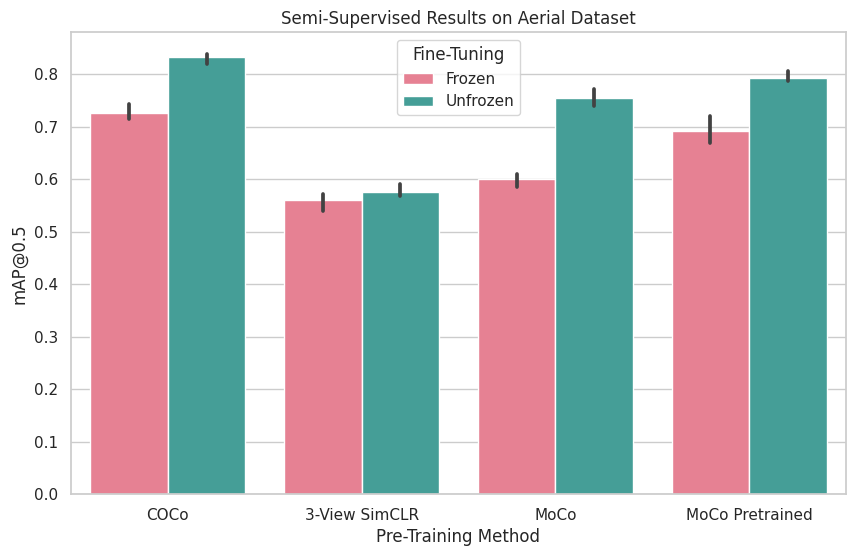

In [49]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot with 95% confidence interval error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=semi_supervised_results, x='Name', y='mAP', ci=95, palette='husl', order=x_ordered, hue="Fine-Tuning")
plt.title('Semi-Supervised Results on Aerial Dataset')
plt.xlabel('Pre-Training Method')
plt.ylabel('mAP@0.5')
plt.show()